In [13]:
%matplotlib inline

import itertools

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits

# for exclusion region
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.patches as mpatches

from auction import BelloniAuctionApproximation as Approximation
from ebm import ExclusiveBuyerMechanismApproximation as EBM

In [2]:
# N = 1, J = 2
N = 1
X = [[0,1],[0,1]]
J = len(X)
c = [0,0]
T = 20

delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)

def f(*x):
    return 1

In [42]:
r = np.sqrt(1/3)
r_opt = (1 - (r**2))*r
r, r_opt

(0.5773502691896257, 0.3849001794597505)

In [11]:
def allocation(x, y, p):
    beta1 = x - p[0]
    beta2 = y - p[1]
    if np.isclose(beta1,beta2) and beta1 >= jk:
        Q1 = Q2 = 1/2
    else:
        Q1 = int(beta1 > beta2) * int(beta1 >= 0 - 1e-10)
        Q2 = int(beta2 > beta1) * int(beta2 >= 0 - 1e-10)
    return Q1, Q2


In [12]:
# without numerical adjustment
def revenue(X, J, N, p, f, Xj_range, delta):
    total = 0
    for ix, x in enumerate(Xj_range):
        for iy, y in enumerate(Xj_range):
        
            Q1, Q2 = allocation(x, y, p)
            
            intQxs = []
            Xj_subset_x = Xj_range[Xj_range <= x + 1e-10]
            if len(Xj_subset_x) > 1:
                endpoints_x = [0, len(Xj_subset_x)-1]
                for ix2, x2 in enumerate(Xj_subset_x):
                    Qx, _ = allocation(x2, y, p)
                    if ix2 in endpoints_x:
                        # 1/x
                        # 2 1 1 1 2 
                        Qx /= 2
                    intQxs.append(Qx * delta)
            intQx = np.sum(intQxs)
            
            intQys = []
            Xj_subset_y = Xj_range[Xj_range <= y + 1e-10]
            if len(Xj_subset_y) > 1:
                endpoints_y = [0, len(Xj_subset_y)-1]
                for iy2, y2 in enumerate(Xj_subset_y):
                    _, Qy = allocation(x, y2, p)
                    if iy2 in endpoints_y:
                        # 1/x
                        # 2 1 1 1 2 
                        Qy /= 2
                    intQys.append(Qy * delta)
            intQy = np.sum(intQys)
            
            U = np.max([intQx, intQy])
        
            total += N * ((Q1 * x) + (Q2 * y) - U) * f(x, y) * np.power(delta, J) 
    return total

In [13]:
for t in range(20):
    T = t+1
    delta = (X[0][1] - X[0][0]) / T
    Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
    
    max_j = -np.inf
    max_xj = -np.inf
    for j, xj in enumerate(Xj_range):
        r_j = revenue(X, J, N, [xj,xj], f, Xj_range, delta)
        if r_j >= max_xj:
            max_j = j
            max_xj = r_j
    print('-----\n',"T=%s" % T, Xj_range[max_j], max_xj)

-----
 T=1 1.0 1.75
-----
 T=2 1.0 0.96875
-----
 T=3 0.6666666666666666 0.7592592592592593
-----
 T=4 0.75 0.6640625
-----
 T=5 0.6000000000000001 0.6100000000000004
-----
 T=6 0.6666666666666666 0.5752314814814814
-----
 T=7 0.5714285714285714 0.5510204081632656
-----
 T=8 0.625 0.533203125
-----
 T=9 0.5555555555555556 0.5195473251028807
-----
 T=10 0.6000000000000001 0.5087500000000004
-----
 T=11 0.5454545454545454 0.49999999999999944
-----
 T=12 0.5833333333333333 0.4927662037037035
-----
 T=13 0.5384615384615385 0.48668639053254437
-----
 T=14 0.5714285714285714 0.4815051020408158
-----
 T=15 0.5333333333333333 0.47703703703703665
-----
 T=16 0.5625 0.47314453125
-----
 T=17 0.5294117647058824 0.46972318339100466
-----
 T=18 0.5555555555555556 0.4666923868312741
-----
 T=19 0.5263157894736842 0.4639889196675887
-----
 T=20 0.55 0.46156249999999854


In [20]:
T = 20
delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
r1 = revenue(X, J, N, [.5,.5], f, Xj_range, delta)
r2 = revenue(X, J, N, [.55,.55], f, Xj_range, delta)
r3 = revenue(X, J, N, [.6,.6], f, Xj_range, delta)
print(np.round(r1,4),np.round(r2,4),np.round(r3,4))

0.4603 0.4616 0.4572


In [21]:
T = 40
delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
r1 = revenue(X, J, N, [.5,.5], f, Xj_range, delta)
r2 = revenue(X, J, N, [.55,.55], f, Xj_range, delta)
r3 = revenue(X, J, N, [.6,.6], f, Xj_range, delta)
print(np.round(r1,4),np.round(r2,4),np.round(r3,4))

0.4385 0.4378 0.4313


In [22]:
T = 100
delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
r1 = revenue(X, J, N, [.5,.5], f, Xj_range, delta)
r2 = revenue(X, J, N, [.55,.55], f, Xj_range, delta)
r3 = revenue(X, J, N, [.6,.6], f, Xj_range, delta)
print(np.round(r1,4),np.round(r2,4),np.round(r3,4))

0.4254 0.4235 0.4157


# Notes

- without numerical adjustment for outer integral, revenue is still higher than it should be ($Revenue = 0.3849$) 
- revenue is decreasing as `T` increases
- optimal reserver price is hovering around .5

In [14]:
# WITH numerical adjustment
def revenue2(X, J, N, p, f, Xj_range, delta):
    total = 0
    for ix, x in enumerate(Xj_range):
        for iy, y in enumerate(Xj_range):
        
            Q1, Q2 = allocation(x, y, p)
            
            intQxs = []
            Xj_subset_x = Xj_range[Xj_range <= x + 1e-10]
            if len(Xj_subset_x) > 1:
                endpoints_x = [0, len(Xj_subset_x)-1]
                for ix2, x2 in enumerate(Xj_subset_x):
                    Qx, _ = allocation(x2, y, p)
                    if ix2 in endpoints_x:
                        # 1/x
                        # 2 1 1 1 2 
                        Qx /= 2
                    intQxs.append(Qx * delta)
            intQx = np.sum(intQxs)
            
            intQys = []
            Xj_subset_y = Xj_range[Xj_range <= y + 1e-10]
            if len(Xj_subset_y) > 1:
                endpoints_y = [0, len(Xj_subset_y)-1]
                for iy2, y2 in enumerate(Xj_subset_y):
                    _, Qy = allocation(x, y2, p)
                    if iy2 in endpoints_y:
                        # 1/x
                        # 2 1 1 1 2 
                        Qy /= 2
                    intQys.append(Qy * delta)
            intQy = np.sum(intQys)
            
            U = np.max([intQx, intQy])
            
            adjust = 1
            adjust /= 2 if ix in [0, T] else 1
            adjust /= 2 if iy in [0, T] else 1    
            
            total += N * ((Q1 * x) + (Q2 * y) - U) * f(x, y) * np.power(delta, J) * adjust
    return total

In [15]:
for t in range(20):
    T = t+1
    delta = (X[0][1] - X[0][0]) / T
    Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
    
    max_j = -np.inf
    max_xj = -np.inf
    for j, xj in enumerate(Xj_range):
        r_j = revenue2(X, J, N, [xj,xj], f, Xj_range, delta)
        if r_j >= max_xj:
            max_j = j
            max_xj = r_j
    print('-----\n',"T=%s" % T, Xj_range[max_j], max_xj)

-----
 T=1 1.0 0.4375
-----
 T=2 0.5 0.3671875
-----
 T=3 0.6666666666666666 0.41435185185185186
-----
 T=4 0.5 0.4013671875
-----
 T=5 0.6000000000000001 0.41550000000000026
-----
 T=6 0.5 0.40943287037037035
-----
 T=7 0.5714285714285714 0.41599854227405264
-----
 T=8 0.5 0.4124755859375
-----
 T=9 0.5555555555555556 0.4162379972565158
-----
 T=10 0.5 0.41393750000000007
-----
 T=11 0.5454545454545454 0.41636927122464296
-----
 T=12 0.5 0.4147497106481477
-----
 T=13 0.5384615384615385 0.4164485662266729
-----
 T=14 0.5 0.41524690233236167
-----
 T=15 0.5333333333333333 0.4164999999999997
-----
 T=16 0.5 0.4155731201171875
-----
 T=17 0.5294117647058824 0.4165352127009984
-----
 T=18 0.5 0.41579861111111055
-----
 T=19 0.5263157894736842 0.41656035865286395
-----
 T=20 0.5 0.4159609375


# Try the stupid simple integral

In [23]:
def stupid(X, J, N, p, f, Xj_range, delta):
    total = 0
    for ix, x in enumerate(Xj_range):
        for iy, y in enumerate(Xj_range):
        
            Q1, Q2 = allocation(x, y, p)
            

            total += N * ((Q1 * p[0]) + (Q2 * p[1])) * f(x, y) * np.power(delta, J)
    return total

In [24]:
T = 20
delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
r1 = stupid(X, J, N, [.5,.5], f, Xj_range, delta)
r2 = stupid(X, J, N, [.55,.55], f, Xj_range, delta)
r3 = stupid(X, J, N, [.6,.6], f, Xj_range, delta)
print(np.round(r1,4),np.round(r2,4),np.round(r3,4))

0.4262 0.44 0.4455


In [25]:
T = 100
delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
r1 = stupid(X, J, N, [.5,.5], f, Xj_range, delta)
r2 = stupid(X, J, N, [.55,.55], f, Xj_range, delta)
r3 = stupid(X, J, N, [.6,.6], f, Xj_range, delta)
print(np.round(r1,4),np.round(r2,4),np.round(r3,4))

0.385 0.3947 0.3961


In [27]:
r

0.5773502691896257

In [28]:
stupid(X, J, N, [r,r], f, Xj_range, delta)

0.394734379044977

# Notes

- stupid integral value is too high

In [29]:
# use numerical adjustment with stupid integral
def stupid2(X, J, N, p, f, Xj_range, delta):
    total = 0
    Q1_array = np.zeros(())
    for ix, x in enumerate(Xj_range):
        for iy, y in enumerate(Xj_range):
        
            Q1, Q2 = allocation(x, y, p)
                    
            adjust = 1
            adjust /= 2 if ix in [0, T] else 1
            adjust /= 2 if iy in [0, T] else 1   
            
            total += N * ((Q1 * p[0]) + (Q2 * p[1])) * f(x, y) * np.power(delta, J) * adjust
    return total

In [30]:
T = 100
delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
r1 = stupid(X, J, N, [.5,.5], f, Xj_range, delta)
r2 = stupid(X, J, N, [.55,.55], f, Xj_range, delta)
r3 = stupid(X, J, N, [.6,.6], f, Xj_range, delta)
print(np.round(r1,4),np.round(r2,4),np.round(r3,4))

0.385 0.3947 0.3961


In [31]:
T = 100
delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
r1 = stupid2(X, J, N, [.5,.5], f, Xj_range, delta)
r2 = stupid2(X, J, N, [.55,.55], f, Xj_range, delta)
r3 = stupid2(X, J, N, [.6,.6], f, Xj_range, delta)
print(np.round(r1,4),np.round(r2,4),np.round(r3,4))

0.3775 0.3866 0.3876


In [32]:
stupid2(X, J, N, [r,r], f, Xj_range, delta)

0.3864638364388346

In [41]:
Ts = []
ps = []
Rs = []
for t in range(50):
    T = t+1
    delta = (X[0][1] - X[0][0]) / T
    Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
    
    max_j = -np.inf
    max_xj = -np.inf
    for j, xj in enumerate(Xj_range):
        r_j = stupid2(X, J, N, [xj,xj], f, Xj_range, delta)
        if r_j >= max_xj:
            max_j = j
            max_xj = r_j
    print("T=%s" % T, Xj_range[max_j], max_xj)
    Ts.append(T)
    ps.append(Xj_range[max_j])
    Rs.append(max_xj)

T=1 1.0 0.75
T=2 0.5 0.46875
T=3 0.6666666666666666 0.5
T=4 0.75 0.45703125
T=5 0.6000000000000001 0.4500000000000003
T=6 0.6666666666666666 0.43981481481481455
T=7 0.5714285714285714 0.42857142857142844
T=8 0.625 0.42724609375
T=9 0.6666666666666666 0.4176954732510288
T=10 0.6000000000000001 0.4185000000000003
T=11 0.6363636363636364 0.4141622839969949
T=12 0.5833333333333333 0.4121817129629632
T=13 0.6153846153846154 0.41055985434683623
T=14 0.5714285714285714 0.4074344023323604
T=15 0.6 0.4073333333333333
T=16 0.625 0.4046630859375
T=17 0.5882352941176471 0.40453897822104584
T=18 0.611111111111111 0.4031635802469129
T=19 0.5789473684210527 0.40213587986587085
T=20 0.6000000000000001 0.40162499999999957
T=21 0.5714285714285714 0.4000647878198915
T=22 0.5909090909090909 0.4001455672426756
T=23 0.6086956521739131 0.3989890687926358
T=24 0.5833333333333333 0.3987630208333304
T=25 0.6 0.39816000000000046
T=26 0.576923076923077 0.39748805188893743
T=27 0.5925925925925926 0.397297159985771

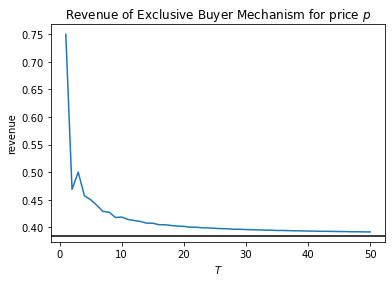

In [43]:
ax = plt.plot(Ts, Rs)

plt.title(r"Revenue of Exclusive Buyer Mechanism for price $p$")
plt.xlabel(r"$T$")
plt.ylabel("revenue")

plt.axhline(r_opt,color='black')

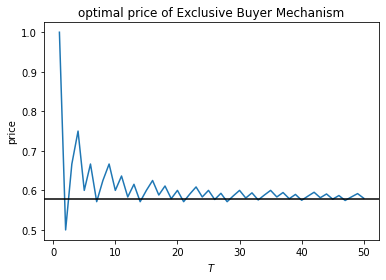

In [44]:
ax = plt.plot(Ts, ps)

plt.title(r"optimal price of Exclusive Buyer Mechanism")
plt.xlabel(r"$T$")
plt.ylabel("price")

plt.axhline(r,color='black')

In [45]:
for t in range(100,105):
    T = t+1
    delta = (X[0][1] - X[0][0]) / T
    Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
    
    max_j = -np.inf
    max_xj = -np.inf
    for j, xj in enumerate(Xj_range):
        r_j = stupid2(X, J, N, [xj,xj], f, Xj_range, delta)
        if r_j >= max_xj:
            max_j = j
            max_xj = r_j
    print("T=%s" % T, Xj_range[max_j], max_xj)

T=101 0.5841584158415841 0.388183889950642
T=102 0.5784313725490196 0.38816447859419345
T=103 0.5825242718446602 0.3881344562731601
T=104 0.576923076923077 0.38808691539603896
T=105 0.580952380952381 0.38807882518089615


In [46]:
r, r_opt

(0.5773502691896257, 0.3849001794597505)

In [48]:
len(Xj_range)

106

In [52]:
# use numerical adjustment with stupid integral
def revenue_simple(X, J, N, p, f, Xj_range, delta):
    Q1_array = np.zeros((len(Xj_range),len(Xj_range)))
    Q2_array = np.zeros((len(Xj_range),len(Xj_range)))
    total = 0
    for ix, x in enumerate(Xj_range):
        for iy, y in enumerate(Xj_range):
        
            Q1, Q2 = allocation(x, y, p)
            Q1_array[ix,iy] = Q1
            Q2_array[ix,iy] = Q2
                    
            adjust = 1
            adjust /= 2 if ix in [0, T] else 1
            adjust /= 2 if iy in [0, T] else 1   
            
            total += N * ((Q1 * p[0]) + (Q2 * p[1])) * f(x, y) * np.power(delta, J) * adjust
    return total, Q1_array, Q2_array

In [55]:
for t in range(10,20):
    T = t+1
    delta = (X[0][1] - X[0][0]) / T
    Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
    
    max_j = -np.inf
    max_xj = -np.inf
    max_Q1 = []
    max_Q2 = []
    for j, xj in enumerate(Xj_range):
        r_j, Q1_array, Q2_array = \
            revenue_simple(X, J, N, [xj,xj], f, Xj_range, delta)
        if r_j >= max_xj:
            max_j = j
            max_xj = r_j
            max_Q1 = Q1_array
            max_Q2 = Q2_array
    print("T=%s" % T, Xj_range[max_j], max_xj)

T=11 0.6363636363636364 0.4141622839969949
T=12 0.5833333333333333 0.4121817129629632
T=13 0.6153846153846154 0.41055985434683623
T=14 0.5714285714285714 0.4074344023323604
T=15 0.6 0.4073333333333333
T=16 0.625 0.4046630859375
T=17 0.5882352941176471 0.40453897822104584
T=18 0.611111111111111 0.4031635802469129
T=19 0.5789473684210527 0.40213587986587085
T=20 0.6000000000000001 0.40162499999999957


In [57]:
max_Q1

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0

In [58]:
Xj_range[max_j]

0.6000000000000001

In [65]:
T = 10
delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
r, Q1, Q2 = revenue_simple(X, J, N, [.55,.55], f, Xj_range, delta)

In [66]:
Q1

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0. , 0. , 0. , 0. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0. , 0. , 0. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0. , 0. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5]])

In [67]:
Q1 + Q2

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

# Notes (testing old code)

- testing old code from auction repo

In [70]:
from auction.exclusive import ExclusiveBuyerMechanismApproximation as EBMApprox

In [84]:
T = 10
ebm = EBMApprox(
    N=1,
    X=[[0,1],[0,1]],
    c=[0,0],
    T=T,
    f=f
)

In [85]:
ebm.obj([.5,.5])

0.43762499999999993

In [86]:
Q1 = [q[0] for q in ebm.Q]

In [87]:
np.array(Q1).reshape((T+1,T+1))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [88]:
delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
Xj_range

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [91]:
p = [[x,x] for x in Xj_range]
ebm.evaluate(p)

0/11
1/11
2/11
3/11
4/11
5/11
6/11
7/11
8/11
9/11
10/11


[0.33474999999999994,
 0.3396249999999999,
 0.363125,
 0.39262499999999995,
 0.42012499999999997,
 0.43762499999999993,
 0.437125,
 0.41062499999999996,
 0.35012499999999996,
 0.24762500000000012,
 0.09512500000000006]

In [92]:
T = 20
ebm = EBMApprox(
    N=1,
    X=[[0,1],[0,1]],
    c=[0,0],
    T=T,
    f=f
)

delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
p = [[x,x] for x in Xj_range]
data = ebm.evaluate(p)
Xj_range[np.argmax(data)], max(data)

0/21
2/21
4/21
6/21
8/21
10/21
12/21
14/21
16/21
18/21
20/21


(0.5, 0.4281406250000007)

In [94]:
T = 21
ebm = EBMApprox(
    N=1,
    X=[[0,1],[0,1]],
    c=[0,0],
    T=T,
    f=f
)

delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
p = [[x,x] for x in Xj_range]
data = ebm.evaluate(p)
Xj_range[np.argmax(data)], max(data)

0/22
2/22
4/22
6/22
8/22
10/22
12/22
14/22
16/22
18/22
20/22


(0.5238095238095237, 0.42820699708454896)

In [93]:
T = 30
ebm = EBMApprox(
    N=1,
    X=[[0,1],[0,1]],
    c=[0,0],
    T=T,
    f=f
)

delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
p = [[x,x] for x in Xj_range]
data = ebm.evaluate(p)
Xj_range[np.argmax(data)], max(data)

0/31
3/31
6/31
9/31
12/31
15/31
18/31
21/31
24/31
27/31
30/31


(0.5, 0.42454166666666765)

In [95]:
T = 31
ebm = EBMApprox(
    N=1,
    X=[[0,1],[0,1]],
    c=[0,0],
    T=T,
    f=f
)

delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)
p = [[x,x] for x in Xj_range]
data = ebm.evaluate(p)
Xj_range[np.argmax(data)], max(data)

0/32
3/32
6/32
9/32
12/32
15/32
18/32
21/32
24/32
27/32
30/32


(0.5161290322580645, 0.42456194823940296)

# Notes

- revenue looks like it's decreasing with T but it's still too high
- the optimal price is ~.5, which is wrong...

# Notes on computing $F^{N-1}$ 

In [3]:
p = [.5,.5]

In [5]:
Xj_range

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [37]:
N = 2
J = 2
X = [[0,1],[0,1]]
T = 10

delta = (X[0][1] - X[0][0]) / T
Xj_range = np.arange(X[0][0], X[0][1] + 1e-10, delta)

def f(x):
    return 1

In [49]:
def FNminus1(x):
    Xj_subsets = []
    for j in range(J):
        Xj_subset = Xj_range[Xj_range <= x[j] + 1e-10]
        Xj_subsets.append(Xj_subset)
    X_subset = itertools.product(*Xj_subsets)

    subset_mass = 0
    for i, x in enumerate(X_subset):
        adjust = 1
        for j in range(J):
            if np.isclose(x[j], Xj_subsets[j][0]) or np.isclose(x[j], Xj_subsets[j][-1]):
                adjust /= 2
        subset_mass += f(x) * np.power(delta, J) * adjust 

    return np.power(subset_mass, N - 1)

In [59]:
FNminus1([1,1]), np.isclose(FNminus1([1,1]), 1)

(1.0000000000000007, True)

In [48]:
np.min(x)

0.5

# Testing Belloni alloc + revenue with new code

In [14]:
def f(x):
    return .25

T = 20

ebm = EBM(
    N=2,
    X=[[6,8],[9,11]],
    c=[.9,5],
    T=T,
    f=f)

In [20]:
p = [6, min(ebm.Xj_ranges[1][ebm.Xj_ranges[1] >= 9.7 - 1e-10])] # CAREFUL WITH PRICE!
res = ebm.obj(p)
print("T=%s" % T, res[0])

T=20 5.233093359374957


In [21]:
Qs = res[1]
print(np.round(np.array([Q[1] for Q in Qs]).reshape((ebm.T+1,ebm.T+1)),4)[:,-5:])

[[0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.1894 0.4463 0.5187 0.5937 0.675 ]
 [0.     0.2231 0.5187 0.5937 0.675 ]
 [0.     0.     0.2594 0.5937 0.675 ]
 [0.     0.     0.     0.2969 0.675 ]
 [0.     0.     0.     0.     0.3375]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]]


In [22]:
Qs = res[1]
print(np.round(np.array([Q[0]+Q[1] for Q in Qs]).reshape((ebm.T+1,ebm.T+1)),4)[:,-5:])

[[0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.3788 0.4463 0.5187 0.5937 0.675 ]
 [0.4463 0.4463 0.5187 0.5937 0.675 ]
 [0.5187 0.5187 0.5187 0.5937 0.675 ]
 [0.5937 0.5937 0.5937 0.5937 0.675 ]
 [0.675  0.675  0.675  0.675  0.675 ]
 [0.725  0.725  0.725  0.725  0.725 ]
 [0.775  0.775  0.775  0.775  0.775 ]
 [0.825  0.825  0.825  0.825  0.825 ]
 [0.875  0.875  0.875  0.875  0.875 ]
 [0.925  0.925  0.925  0.925  0.925 ]
 [0.975  0.975  0.975  0.975  0.975 ]
 [1.     1.     1.     1.     1.    ]]


In [23]:
Q1 = np.round(np.array([Q[0] for Q in Qs]).reshape((ebm.T+1,ebm.T+1)),4)
Q2 = np.round(np.array([Q[1] for Q in Qs]).reshape((ebm.T+1,ebm.T+1)),4)

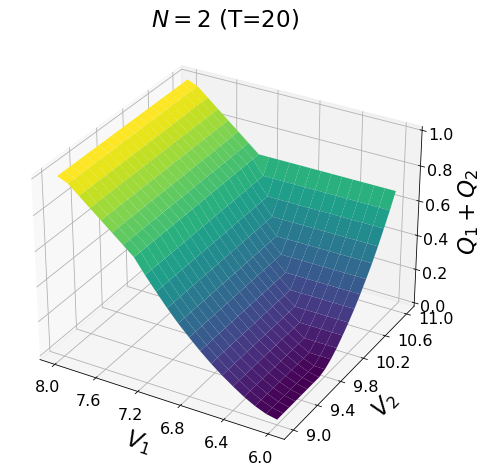

In [24]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))

n_ticks = 6
xticks = np.linspace(ebm.X[0][0], ebm.X[0][1], n_ticks) 
yticks = np.linspace(ebm.X[1][0], ebm.X[1][1], n_ticks) 

X = np.array(ebm.Xj_ranges[0])
Y = np.array(ebm.Xj_ranges[1])
X, Y = np.meshgrid(X, Y)
Z = (Q1+Q2).T

# ax.plot_surface(X, Y, Z, color='grey') #cmap to make it easier to see ? 

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.title.set_text(r"$N=2$ (T=%s)" % ebm.T)
ax.title.set_size('x-large')

ax.invert_xaxis()
ax.set_xlabel(r"$V_1$", size='x-large',  labelpad=10)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, va='top') 

ax.set_ylabel(r"$V_2$", size='x-large',  labelpad=10)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, ha='left', va='bottom')

ax.set_zlim(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$Q_1 + Q_2$", rotation=90, size='x-large', labelpad=10)
ax.zaxis.set_major_formatter('{x:.01f}')

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.rcParams.update({'font.size': 16})

plt.savefig("setting2_N2.png")
plt.show()

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))

n_ticks = 6
xticks = np.linspace(ebm.X[0][0], ebm.X[0][1], n_ticks) 
yticks = np.linspace(ebm.X[1][0], ebm.X[1][1], n_ticks) 

X = np.array(ebm.Xj_ranges[0])
Y = np.array(ebm.Xj_ranges[1])
X, Y = np.meshgrid(X, Y)
Z = (Q1+Q2).T

# ax.plot_surface(X, Y, Z, color='grey') #cmap to make it easier to see ? 

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.title.set_text(r"$N=2$ (T=%s)" % ebm.T)
ax.title.set_size('x-large')

ax.invert_xaxis()
ax.set_xlabel(r"$V_1$", size='x-large',  labelpad=10)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, va='top') 

ax.set_ylabel(r"$V_2$", size='x-large',  labelpad=10)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, ha='left', va='bottom')

ax.set_zlim(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$Q_1 + Q_2$", rotation=90, size='x-large', labelpad=10)
ax.zaxis.set_major_formatter('{x:.01f}')

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.rcParams.update({'font.size': 16})

plt.savefig("setting2_N2.png")
plt.show()

In [12]:
for T in range(99,101):
    ebm = EBM(
        N=2,
        X=[[6,8],[9,11]],
        c=[.9,5],
        T=T,
        f=f)
    p1 = min(ebm.Xj_ranges[0][ebm.Xj_ranges[0] >= 7.0 - 1e-10])
    p = (p1,11)
    print(T, np.round(p,4), np.round(ebm.FNminus1(p),4))

KeyboardInterrupt: 

In [26]:
N1vals = []
N2vals = []
for T in range(1,51):
    for N in [1,2]:
        ebm = EBM(
            N=N,
            X=[[6,8],[9,11]],
            c=[.9,5],
            T=T,
            f=f)
        p2 = min(ebm.Xj_ranges[1][ebm.Xj_ranges[1] >= 9.9 - 1e-10])
        p = (6,p2)
        r = np.round(ebm.obj(p)[0],4)
        print(T,N, np.round(p,4), r)
        if N == 1:
            N1vals.append(r)
        if N == 2:
            N2vals.append(r)

1 1 [ 6. 11.] 5.2125
1 2 [ 6. 11.] 7.7625
2 1 [ 6. 10.] 5.0812
2 2 [ 6. 10.] 7.1906
3 1 [ 6.     10.3333] 5.1194
3 2 [ 6.     10.3333] 6.5865
4 1 [ 6. 10.] 5.0859
4 2 [ 6. 10.] 6.1667
5 1 [ 6.  10.2] 5.109
5 2 [ 6.  10.2] 6.0026
6 1 [ 6. 10.] 5.0868
6 2 [ 6. 10.] 5.8012
7 1 [ 6.     10.1429] 5.1042
7 2 [ 6.     10.1429] 5.7343
8 1 [ 6. 10.] 5.0871
8 2 [ 6. 10.] 5.6192
9 1 [ 6.     10.1111] 5.1011
9 2 [ 6.     10.1111] 5.5857
10 1 [ 6. 10.] 5.0873
10 2 [ 6. 10.] 5.5111
11 1 [6.     9.9091] 5.0712
11 2 [6.     9.9091] 5.4537
12 1 [ 6. 10.] 5.0873
12 2 [ 6. 10.] 5.4396
13 1 [6.     9.9231] 5.0741
13 2 [6.     9.9231] 5.4057
14 1 [ 6. 10.] 5.0874
14 2 [ 6. 10.] 5.3957
15 1 [6.     9.9333] 5.0761
15 2 [6.     9.9333] 5.3644
16 1 [ 6. 10.] 5.0874
16 2 [ 6. 10.] 5.3603
17 1 [6.     9.9412] 5.0776
17 2 [6.     9.9412] 5.3325
18 1 [ 6. 10.] 5.0874
18 2 [ 6. 10.] 5.33
19 1 [6.     9.9474] 5.0788
19 2 [6.     9.9474] 5.3071
20 1 [6.  9.9] 5.0696
20 2 [6.  9.9] 5.2854
21 1 [6.     9.9524] 5.0797
2

Text(0, 0.5, 'price')

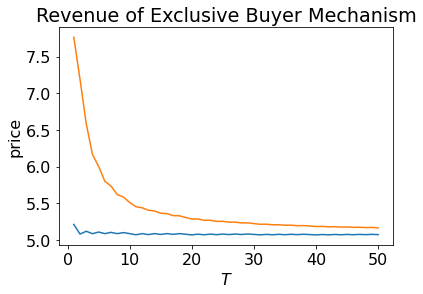

In [28]:
Ts = list(range(1,51))
ax = plt.plot(Ts, N1vals)
ax = plt.plot(Ts, N2vals)

plt.title(r"Revenue of Exclusive Buyer Mechanism")
plt.xlabel(r"$T$")
plt.ylabel("price")

In [25]:
N1vals

[5.0737]

In [50]:
ebm = EBM(
    N=2,
    X=[[6,8],[9,11]],
    c=[.9,5],
    T=20,
    f=f)
p1 = min(ebm.Xj_ranges[0][ebm.Xj_ranges[0] >= 6.0 - 1e-10])
p2 = min(ebm.Xj_ranges[1][ebm.Xj_ranges[1] >= 10.15  - 1e-10])
p = (p1,p2)
r = np.round(ebm.obj(p)[0],4)
print(np.round(p,4), r)

[ 6.  10.2] 5.3262
